In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for the model
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

# for feature engineering
from feature_engine.discretisers import EqualFrequencyDiscretiser
from feature_engine.discretisers import EqualWidthDiscretiser
from sklearn.preprocessing import StandardScaler

#for feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel,RFE

# Evaluation metrics
from sklearn.metrics import roc_auc_score, r2_score

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [2]:
telecom = pd.read_csv('Dataset.csv')

In [3]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
telecom.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
telecom.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,6933-FHBZC,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [6]:
telecom.TotalCharges = pd.to_numeric(telecom.TotalCharges, errors='coerce')

In [7]:
missing_val_count_by_column = telecom.isnull().sum()
print(missing_val_count_by_column[missing_val_count_by_column>0])

TotalCharges    11
dtype: int64


<b>Some of the values in TotalCharges are Missing Completely At Random and hence can be removed</b>

In [8]:
telecom.dropna(inplace = True)

In [9]:
telecom['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

# Numerical Features

<b>a) MonthlyCharges and Total charges</b>

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

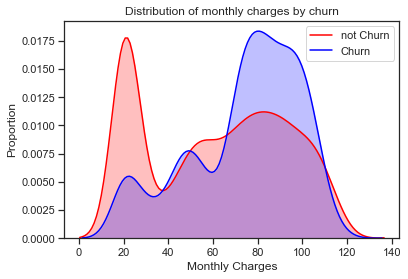

In [17]:
    ax = sns.kdeplot(telecom['MonthlyCharges'][(telecom["Churn"] == 'No') ],
                    color="red", shade = True)
    ax = sns.kdeplot(telecom['MonthlyCharges'][(telecom["Churn"] == 'Yes') ],
                    color="blue", shade= True)
    ax.legend(["not Churn","Churn"])
    ax.set_ylabel('Proportion')
    ax.set_xlabel('Monthly Charges')
    ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

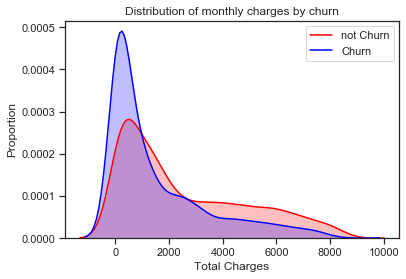

In [16]:
ax = sns.kdeplot(telecom['TotalCharges'][(telecom["Churn"] == 'No') ],
                color="red", shade = True)
ax = sns.kdeplot(telecom['TotalCharges'][(telecom["Churn"] == 'Yes') ],
                color="blue", shade= True)
ax.legend(["not Churn","Churn"])
ax.set_ylabel('Proportion')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of monthly charges by churn')

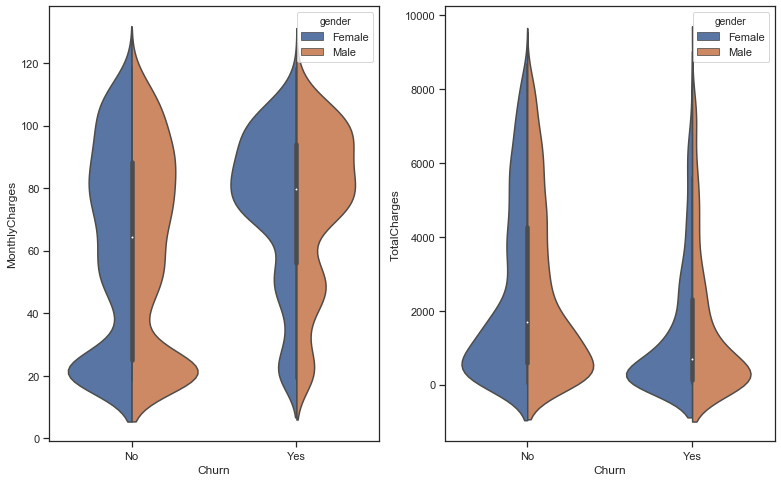

In [12]:
f, axes = plt.subplots(1, 2, figsize=(13,8),sharex=True )
sns.violinplot(x="Churn", y="MonthlyCharges", hue="gender", split=True, data=telecom,ax=axes[0])
sns.violinplot(x="Churn", y="TotalCharges", hue="gender", split=True, data=telecom,ax=axes[1])

- Customers with high monthly charges are more likely to churn
- Customers with very low Total charges have slightly higher churn rate


<b> b) Tenure </b>

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

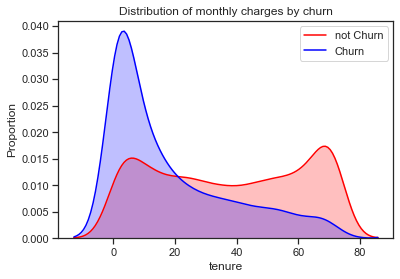

In [15]:
ax = sns.kdeplot(telecom['tenure'][(telecom["Churn"] == 'No') ],
                color="red", shade = True)
ax = sns.kdeplot(telecom['tenure'][(telecom["Churn"] == 'Yes') ],
                color="blue", shade= True)
ax.legend(["not Churn","Churn"])
ax.set_ylabel('Proportion')
ax.set_xlabel('tenure')
ax.set_title('Distribution of monthly charges by churn')

- As we can see form the above plot, the customers who do not churn, they tend to stay for a longer with the telecom company.

# Categorical Features

There is a total of 16 Categorical features

<b> C) Age group(Senior Citizen) and gender</b> 


In [18]:
telecom['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [19]:
telecom['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

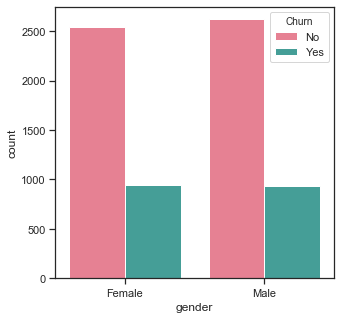

In [20]:
plt.figure(figsize = (5,5))
sns.countplot(telecom.gender, hue = telecom.Churn,palette='husl')

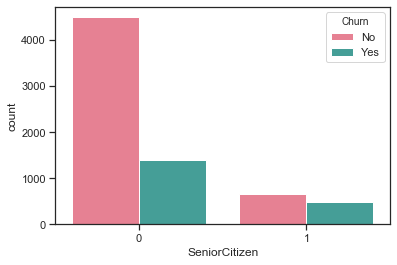

In [21]:
sns.countplot(x="SeniorCitizen",hue='Churn', palette="husl",data=telecom)

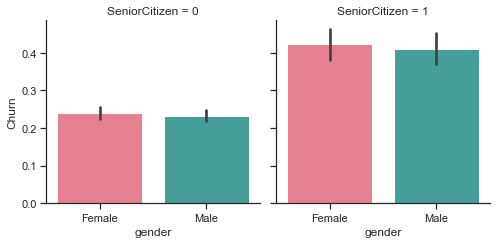

In [22]:
telecom['Churn'] = telecom['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(telecom, col="SeniorCitizen", height=3.5, aspect=1)
ax = g.map(sns.barplot, "gender", "Churn",palette='husl', order= ['Female', 'Male'])

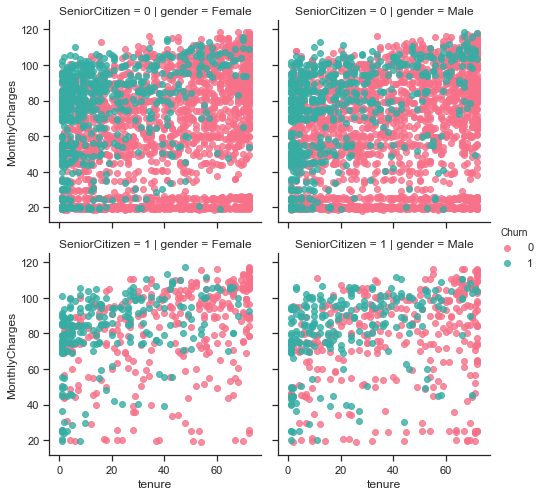

In [23]:
g = sns.FacetGrid(telecom, row='SeniorCitizen', col="gender", hue="Churn", height=3.5,palette = "husl")
g.map(plt.scatter, "tenure", "MonthlyCharges",alpha=0.8)
g.add_legend();

<b>Key takeaways</b>
- About half of the customers are male and the other half is female.
- There is no difference in senior citizen status by gender as they are equally distributed.
- Even though SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.
- gender seems to be very less predictive feature for churn.

<b>D) Partners and Dependents </b>

In [24]:
telecom['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [25]:
telecom['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

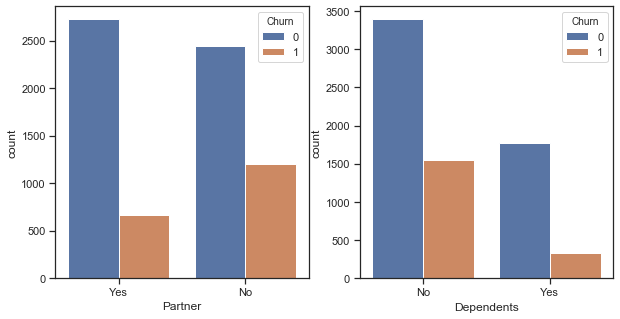

In [26]:
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
sns.countplot(x="Partner",hue='Churn', data=telecom,ax=axes[0])
sns.countplot(x="Dependents",hue='Churn',data=telecom, ax=axes[1])


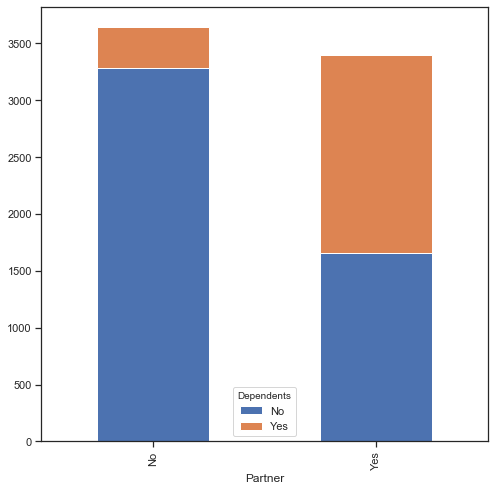

In [27]:
pd.crosstab(telecom['Partner'], telecom['Dependents']).plot(kind = 'bar', stacked = True, figsize = (8,8))

- Around 50% of the customers have a partner, while only 30% of the total customers have dependents. 
- Interestingly around 50% of the customers who have a Partner also have Dependents. 

 <b>E) Phone and Internet Services</b>

<b>Phone Services</b>

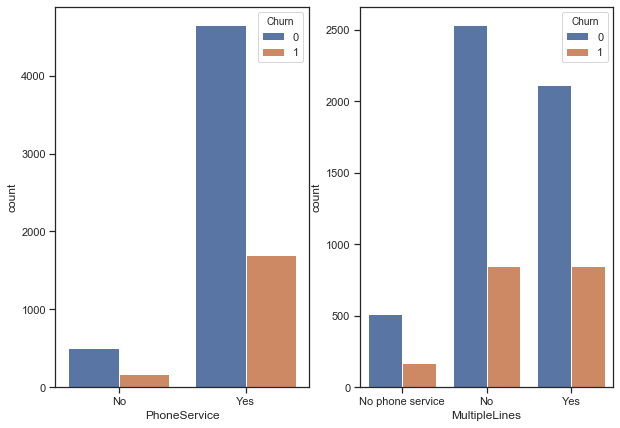

In [28]:
f, axes = plt.subplots(1, 2, figsize=(10, 7), sharex=False)
sns.countplot(x="PhoneService",hue='Churn',  data=telecom,ax=axes[0])
sns.countplot(x="MultipleLines",hue='Churn', data=telecom,ax=axes[1])

- Very few customers don't have phone service.
- 46% of the customers have phone service use multiple lines.


<b>F) Internet and other Additional Services</b>

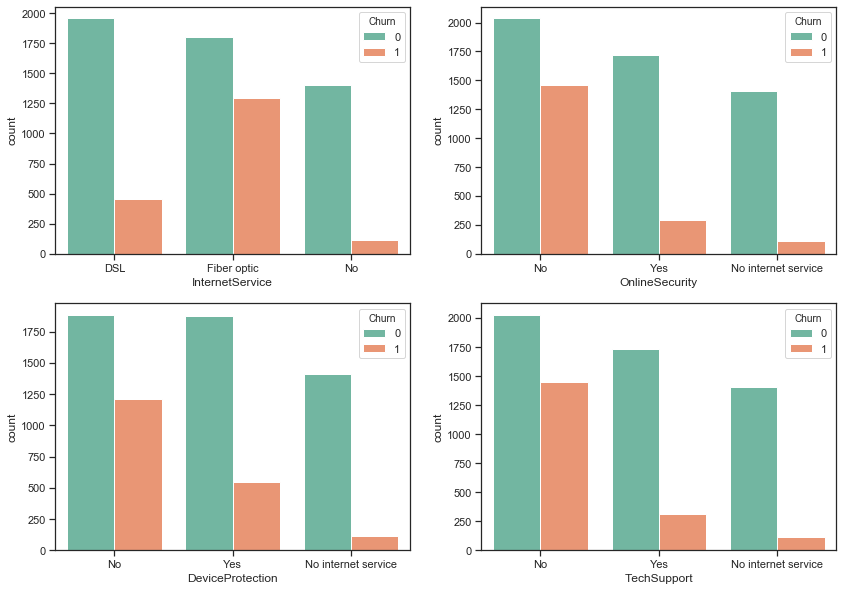

In [29]:
f, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False)
sns.countplot(x="InternetService",hue='Churn', palette="Set2", data=telecom,ax=axes[0,0])
sns.countplot(x="OnlineSecurity",hue='Churn', palette='Set2', data=telecom,ax=axes[0,1])
sns.countplot(x="DeviceProtection",hue='Churn', palette='Set2', data=telecom,ax=axes[1,0])
sns.countplot(x="TechSupport",hue='Churn', palette='Set2' ,data=telecom,ax=axes[1,1])


In [30]:
pd.crosstab(telecom.InternetService, telecom.PhoneService, margins = True)

PhoneService,No,Yes,All
InternetService,,,
DSL,680,1736,2416
Fiber optic,0,3096,3096
No,0,1520,1520
All,680,6352,7032


- All the customer who don't use phone service,use DSL Internet Service.
- Customers who use Fiber optic have a high churn rate(42%) compared to DSL(16%). 
- Customers with no Internet Service have low churn rate.
- Customers with additional services(OnlineSecurity,DeviceProtection,TechSupport) are less likely to churn.

<b>G) Payment Method</b>

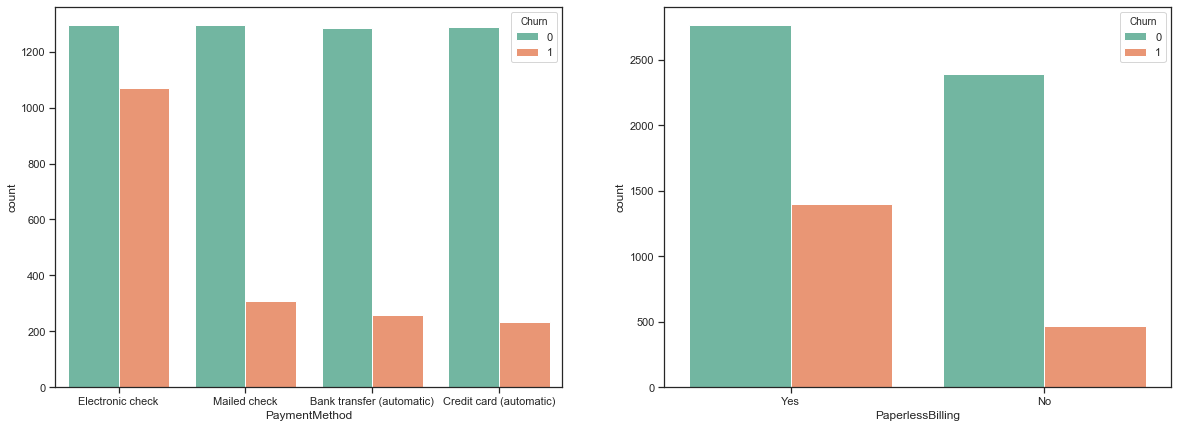

In [31]:
f, axes = plt.subplots(1, 2, figsize=(20, 7), sharex=False)
sns.countplot(x="PaymentMethod",hue='Churn',palette='Set2', data=telecom,ax=axes[0])
sns.countplot(x="PaperlessBilling",hue='Churn',palette='Set2', data=telecom,ax=axes[1])

- There is 45% churn when using Electronic check,even though it is most widely used.
- Customers with Paperless billing are more likely to churn.

<b>H) Contract</b>

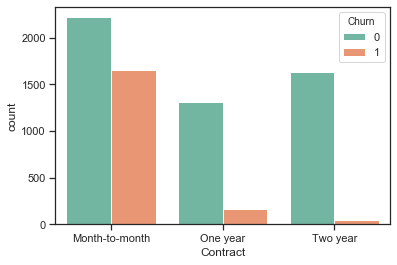

In [32]:
sns.countplot(telecom['Contract'], hue = telecom.Churn,palette='Set2')

-  Customers who have a month to month contract have a very high churn rate.
- And the churn rate decreases as the duration of the contract increases.

In [33]:
telecom['Churn'] = telecom['Churn'].replace("No", 0).replace("Yes", 1)

In [34]:
telecom.drop(['customerID'], axis = 1, inplace = True)

In [35]:
telecom_dummies = pd.get_dummies(telecom)
telecom_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [36]:
y = telecom_dummies['Churn'].values
X = telecom_dummies.drop(columns = ['Churn'])

### Discretisation helps handle outliers and may improve value spread in skewed variables

In [37]:
disc = EqualWidthDiscretiser(bins=10, variables = ['tenure', 'MonthlyCharges','TotalCharges'])

disc.fit(X)

EqualWidthDiscretiser(bins=10, return_object=False,
                      variables=['tenure', 'MonthlyCharges', 'TotalCharges'])

In [38]:
disc.binner_dict_

{'tenure': [-inf,
  8.1,
  15.2,
  22.299999999999997,
  29.4,
  36.5,
  43.599999999999994,
  50.699999999999996,
  57.8,
  64.9,
  inf],
 'MonthlyCharges': [-inf,
  28.3,
  38.35,
  48.400000000000006,
  58.45,
  68.5,
  78.55000000000001,
  88.60000000000001,
  98.65,
  108.7,
  inf],
 'TotalCharges': [-inf,
  885.4,
  1752.0,
  2618.6000000000004,
  3485.2000000000003,
  4351.8,
  5218.400000000001,
  6085.0,
  6951.6,
  7818.200000000001,
  inf]}

In [39]:
X = disc.transform(X)

<b>Splitting the dataset into training and testing set(train set 70% and test set 30%)</b>

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
X_train.shape, X_test.shape

((4922, 45), (2110, 45))

In [42]:
X_train_original = X_train.copy()
X_test_original = X_test.copy()

 <b>Features should be highly correlated with the target, yet uncorrelated to each other.Therefore we will go ahead and remove those features which are highly correlated among themselves.</b>

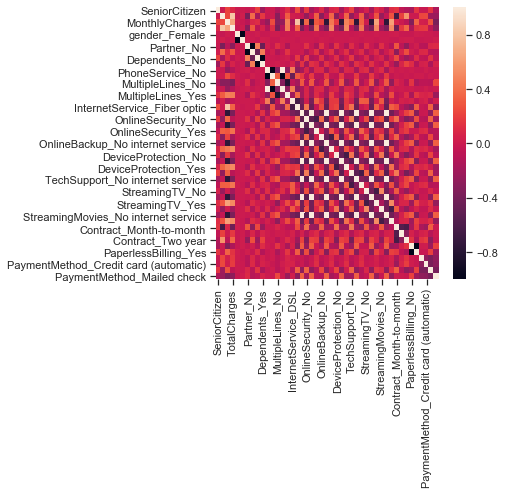

In [43]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.heatmap(corrmat)

<b>In the plot above, the white and black squares correspond to highly correlated features (|x|>0.8). We can see that there are quite a lot of them. The diagonal represents the correlation of a feature with itself, therefore the value is 1.</b>


## Brute force approach

In [44]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  14


<b>We can see that 14 features are highly correlated with other features in the training set.Therefore we will drop them .</b>

In [45]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

C:\Users\sidft\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


((4922, 31), (2110, 31))

In [46]:
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

## Univariate roc-auc selection

<b>Rank the features according to Univariate roc-auc and select the highest ranked features</b>

In [47]:
# find important features using univariate roc-auc

# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set

roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

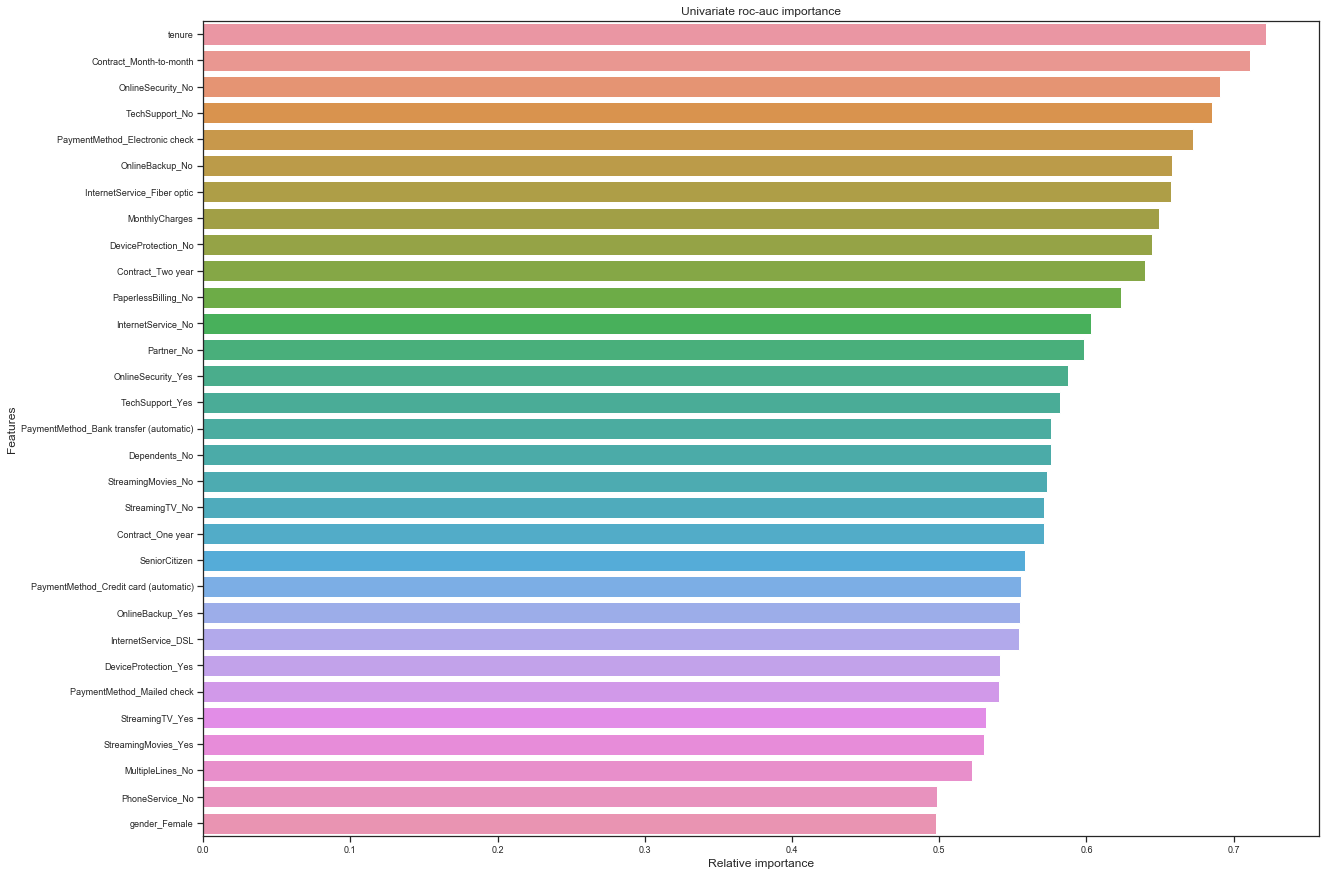

In [48]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=roc_values.sort_values(ascending=False).index, x = roc_values.sort_values(ascending=False))
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Univariate roc-auc importance");

In [49]:
selected_feat = roc_values[roc_values>0.5]
len(selected_feat), X_train.shape[1]

(29, 31)

## Recursive Feature Addition
<b> Rank the features according to their importance derived from XGB Classifier</b>

In [50]:
# the first step of this procedure  consists in building
# a machine learning algorithm using all the available features
# and then determine the importance of the features according
# to the algorithm

# set the seed for reproducibility
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model using all the features
model_all_features = xgb.XGBClassifier(
    nthread=10, max_depth=4, n_estimators=500, learning_rate=0.05)

model_all_features.fit(X_train, y_train)

# calculate the roc-auc in the test set
y_pred_test = model_all_features.predict_proba(X_test)[:, 1]
auc_score_all = roc_auc_score(y_test, y_pred_test)
print('Test all features xgb ROC AUC=%f' % (auc_score_all))

Test all features xgb ROC AUC=0.818322


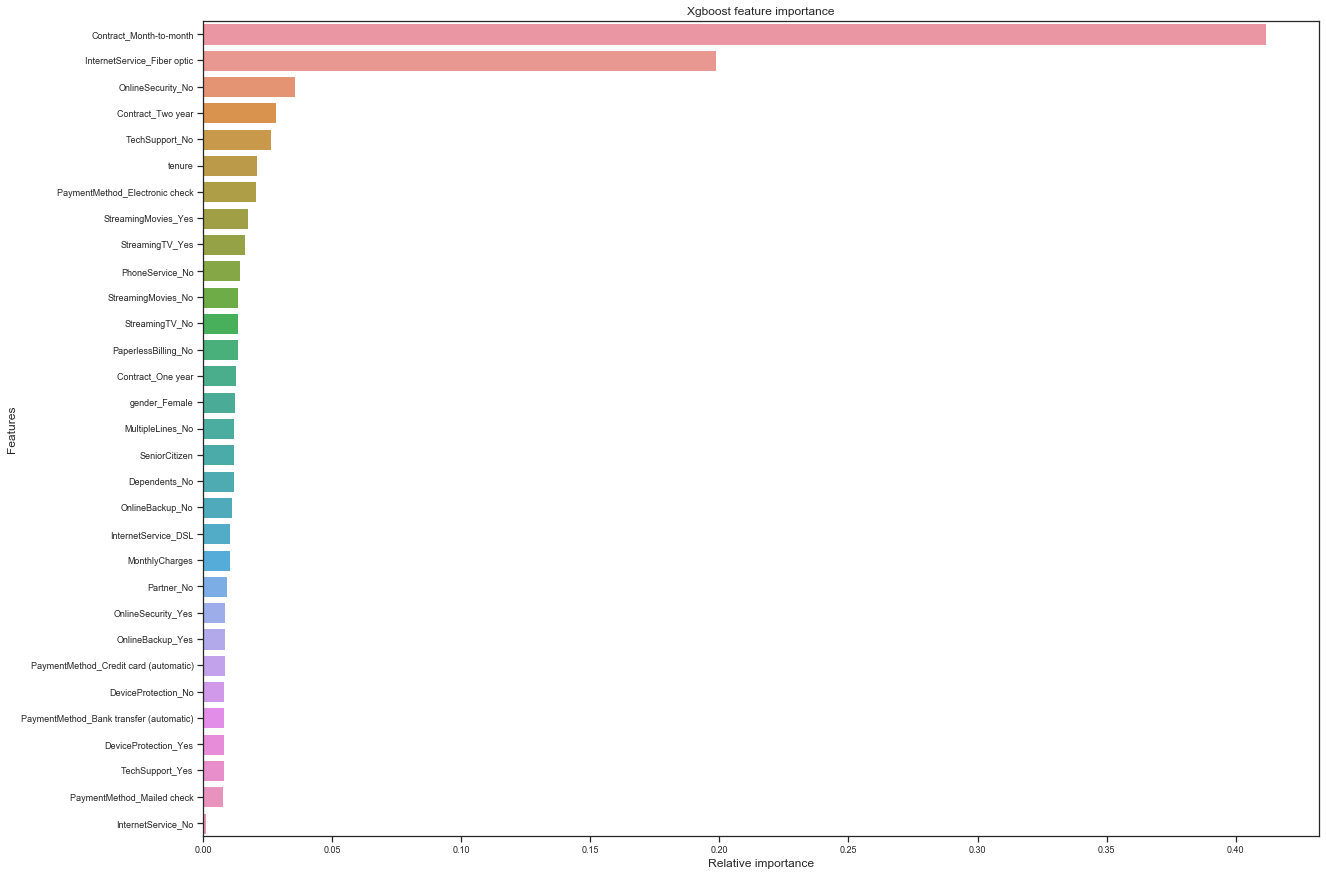

In [51]:
features = pd.Series(model_all_features.feature_importances_)
features.index = X_train.columns
# sort the features by importance
features.sort_values(ascending=False, inplace=True)

plt.subplots(figsize=(20, 15))
g = sns.barplot(y=features.sort_values(ascending=False).index, x = features.sort_values(ascending=False))
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Xgboost feature importance");

In [52]:
# view the list of ordered features
features = list(features.index)
features

['Contract_Month-to-month',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'Contract_Two year',
 'TechSupport_No',
 'tenure',
 'PaymentMethod_Electronic check',
 'StreamingMovies_Yes',
 'StreamingTV_Yes',
 'PhoneService_No',
 'StreamingMovies_No',
 'StreamingTV_No',
 'PaperlessBilling_No',
 'Contract_One year',
 'gender_Female',
 'MultipleLines_No',
 'SeniorCitizen',
 'Dependents_No',
 'OnlineBackup_No',
 'InternetService_DSL',
 'MonthlyCharges',
 'Partner_No',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'PaymentMethod_Credit card (automatic)',
 'DeviceProtection_No',
 'PaymentMethod_Bank transfer (automatic)',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'PaymentMethod_Mailed check',
 'InternetService_No']

<b> Building a machine learning model with only 1 feature, the most important one, and calculate the model metric for performance.</b>

In [53]:
# next, we need to build a machine learning
# algorithm using only the most important feature

# set the seed for reproducibility
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model using all the features
model_one_feature = xgb.XGBClassifier(
    nthread=10, max_depth=4, n_estimators=150, learning_rate=0.05)

# train using only the most important feature
model_one_feature.fit(X_train[features[0]].to_frame(), y_train)

# calculate the roc-auc in the test set
y_pred_test = model_one_feature.predict_proba(X_test[features[0]].to_frame())[:, 1]
auc_score_first = roc_auc_score(y_test, y_pred_test)
print('Test one feature xgb ROC AUC=%f' % (auc_score_first))

Test one feature xgb ROC AUC=0.710845


<b>Adding a feature at each round and calculate the roc-auc,if the metric increases by more than the given threshold the feature is kept otherwise the feature is removed.</b>

In [54]:

## the final step consists in adding one at a time
# all the features, from the most to the least
# important, and build an xgboost at each round.

# once we build the model, we calculate the new roc-auc
# if the new roc-auc is bigger than the original one
# (with one feature), then that feature that was added
# was important, and we should keep it.
# otherwise, we should remove the feature

# recursive feature addition:

# first we arbitrarily set the increase in roc-auc
# if the increase is above this threshold,
# the feature will be kept
tol = 0.0009

print('doing recursive feature addition')

# we initialise a list where we will collect the
# features we should keep
features_to_keep = [features[0]]

# set a counter to know how far ahead the loop is going
count = 1

# now we loop over all the features, in order of importance:
# remember that features is the list of ordered features
# by importance
for feature in features[1:]:
    print()
    print('testing feature: ', feature, ' which is feature ', count,
          ' out of ', len(features))
    count = count + 1

    # initialise model
    model_int = xgb.XGBClassifier(
        nthread=10, max_depth=4, n_estimators=150, learning_rate=0.05)

    # fit model with the selected features
    # and the feature to be evaluated
    model_int.fit(
        X_train[features_to_keep + [feature] ], y_train)

    # make a prediction over the test set
    y_pred_test = model_int.predict_proba(
        X_test[features_to_keep + [feature] ])[:, 1]

    # calculate the new roc-auc
    auc_score_int = roc_auc_score(y_test, y_pred_test)
    print('New Test ROC AUC={}'.format((auc_score_int)))

    # print the original roc-auc with one feature
    print('All features Test ROC AUC={}'.format((auc_score_first)))

    # determine the increase in the roc-auc
    diff_auc = auc_score_int - auc_score_first

    # compare the increase in roc-auc with the tolerance
    # we set previously
    if diff_auc >= tol:
        print('Increase in ROC AUC={}'.format(diff_auc))
        print('keep: ', feature)
        print
        # if the increase in the roc is bigger than the threshold
        # we keep the feature and re-adjust the roc-auc to the new value
        # considering the added feature
        auc_score_first = auc_score_int
        
        # and we append the feature to keep to the list
        features_to_keep.append(feature)
    else:
        # we ignore the feature
        print('Increase in ROC AUC={}'.format(diff_auc))
        print('remove: ', feature)
        print


# now the loop is finished, we evaluated all the features
print('DONE!!')
print('total features to keep: ', len(features_to_keep))

doing recursive feature addition

testing feature:  InternetService_Fiber optic  which is feature  1  out of  31
New Test ROC AUC=0.768593733637595
All features Test ROC AUC=0.7108450164501506
Increase in ROC AUC=0.05774871718744434
keep:  InternetService_Fiber optic

testing feature:  OnlineSecurity_No  which is feature  2  out of  31
New Test ROC AUC=0.7881728077110297
All features Test ROC AUC=0.768593733637595
Increase in ROC AUC=0.019579074073434732
keep:  OnlineSecurity_No

testing feature:  Contract_Two year  which is feature  3  out of  31
New Test ROC AUC=0.7923379927709095
All features Test ROC AUC=0.7881728077110297
Increase in ROC AUC=0.004165185059879839
keep:  Contract_Two year

testing feature:  TechSupport_No  which is feature  4  out of  31
New Test ROC AUC=0.7991792761473391
All features Test ROC AUC=0.7923379927709095
Increase in ROC AUC=0.00684128337642953
keep:  TechSupport_No

testing feature:  tenure  which is feature  5  out of  31
New Test ROC AUC=0.82310305423

In [55]:
# capture the 14 selected features
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model
final_xgb = xgb.XGBClassifier(
    nthread=10, max_depth=4, n_estimators=120, learning_rate=0.05)

# fit the model with the selected features
final_xgb.fit(X_train[features_to_keep], y_train)

# make predictions
y_pred_test = final_xgb.predict_proba(X_test[features_to_keep])[:, 1]

# calculate roc-auc
auc_score_final = roc_auc_score(y_test, y_pred_test)
print('Test selected features ROC AUC=%f' % (auc_score_final))

Test selected features ROC AUC=0.837966
